In [1]:
%matplotlib notebook
import numpy as np # linear algebra
import pandas as pnd # data processing
import seaborn as sns  # data visualization library  
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
import seaborn as sns
color = sns.color_palette()

from sklearn.model_selection import train_test_split

In [2]:
df = pnd.read_csv('df_subset_main.csv')
#df= pnd.read_csv('D:/etude Sherbrooke/IFT870-Forage de donnee/tp2/dataWanlin.csv')
df = df.drop("Unnamed: 0", axis=1)
df=df.drop(['eval_set'], axis=1)

In [3]:
df.head()

,user_id,store_id,distance,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,special
0,12166,8,1.015432,730324,43,2,9,6.0,22275,23,0,0
1,205543,8,1.468142,27893,77,0,11,0.0,13225,1,1,0
2,148902,7,0.753291,1467203,2,4,18,6.0,11599,8,0,50
3,59106,4,2.209840,1019217,96,2,16,2.0,5876,5,1,50
4,182401,5,1.573808,2224958,46,3,20,3.0,8022,11,1,0


In [4]:
df.shape

(58616, 12)

In [5]:
label = 'reordered'
x_cols = df.columns.drop('reordered')

In [6]:
X = df[x_cols]
y = df[label]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.25)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(43962, 11) (43962,)
(14654, 11) (14654,)


In [8]:
# freeing memory
del df, X, y

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.callbacks import History
from keras import backend as K
from sklearn.preprocessing import MinMaxScaler

In [10]:
sc = MinMaxScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [11]:
input_dim =  X_train_sc.shape[1]
input_dim

11

In [12]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [69]:
history = History()

classifier = Sequential()

classifier.add(Dense(units = 40, activation = 'relu', input_dim = input_dim))
classifier.add(Dense(units = 38, activation = 'relu'))
classifier.add(Dense(units = 25, activation = 'relu'))
classifier.add(Dense(units = 1, activation ='sigmoid'))

classifier.compile(optimizer = "rmsprop", loss = 'binary_crossentropy', metrics = ['accuracy', f1_m, precision_m, recall_m])

classifier.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 40)                480       
                                                                 
 dense_82 (Dense)            (None, 38)                1558      
                                                                 
 dense_83 (Dense)            (None, 25)                975       
                                                                 
 dense_84 (Dense)            (None, 1)                 26        
                                                                 
Total params: 3,039
Trainable params: 3,039
Non-trainable params: 0
_________________________________________________________________


In [67]:
%%time
# fit the model
classifier.fit(X_train_sc, y_train, epochs=10, batch_size=16, verbose=1,class_weight= {0:1, 1:10},
          callbacks = [history, keras.callbacks.EarlyStopping(monitor='loss',
                                                              min_delta=0, patience=10, verbose=0, mode='auto')])

Epoch 1/10
2748/2748 [==============================] - 11s 4ms/step - loss: nan - accuracy: 0.2248 - f1_m: nan - precision_m: nan - recall_m: nan
Epoch 2/10
2748/2748 [==============================] - 10s 4ms/step - loss: nan - accuracy: 0.2248 - f1_m: nan - precision_m: nan - recall_m: nan
Epoch 3/10
2748/2748 [==============================] - 11s 4ms/step - loss: nan - accuracy: 0.2248 - f1_m: nan - precision_m: nan - recall_m: nan
Epoch 4/10
2748/2748 [==============================] - 11s 4ms/step - loss: nan - accuracy: 0.2248 - f1_m: nan - precision_m: nan - recall_m: nan
Epoch 5/10
2748/2748 [==============================] - 11s 4ms/step - loss: nan - accuracy: 0.2248 - f1_m: nan - precision_m: nan - recall_m: nan
Epoch 6/10
2748/2748 [==============================] - 11s 4ms/step - loss: nan - accuracy: 0.2248 - f1_m: nan - precision_m: nan - recall_m: nan
Epoch 7/10
2748/2748 [==============================] - 10s 4ms/step - loss: nan - accuracy: 0.2248 - f1_m: nan - prec

In [54]:
eval_model=classifier.evaluate(X_train_sc, y_train)
print('loss: ', eval_model[0], 'and Accuracy: ', eval_model[1])

1374/1374 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.2248 - f1_m: nan - precision_m: nan - recall_m: nan
loss:  nan and Accuracy:  0.2248305380344391


<IPython.core.display.Javascript object>


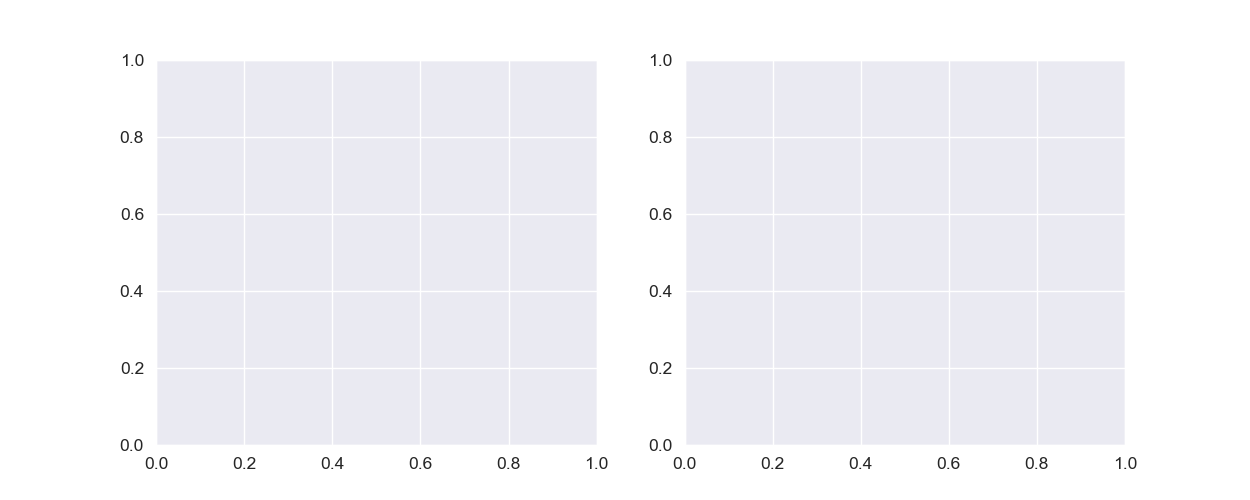

KeyError: 'acc'

In [33]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))

# Accuracy
ax[0].plot(history.history['acc'])
ax[0].plot(history.history['val_acc'])
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('# Epoch')
ax[0].legend(['train', 'test'], loc='upper left')
ax[0].set_title('Accuracy')

# Loss
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('# Epoch')
ax[1].legend(['train', 'test'], loc='upper left')
ax[1].set_title('Loss')

In [55]:
probabilities = classifier.predict_proba(X_test_sc)
predictions = classifier.predict_classes(X_test_sc)

print ("\n Classification report : \n",classification_report(y_test, predictions))
print ("Accuracy   Score : ",accuracy_score(y_test, predictions))

#confusion matrix
conf_matrix = confusion_matrix(y_test,predictions)
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.heatmap(conf_matrix, fmt = "d",annot=True, cmap='Blues')
b, t = plt.ylim()
plt.ylim(b + 0.5, t - 0.5)
plt.title('Confuion Matrix')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')

#f1-score
f1 = f1_score(y_test, predictions)
print("F1 Score: ", f1)

#roc_auc_score
model_roc_auc = roc_auc_score(y_test,probabilities) 
print ("Area under curve : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test,probabilities)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
threshold = np.round(thresholds[ix],3)

plt.subplot(222)
plt.plot(fpr, tpr, color='darkorange', lw=1, label = "Auc : %.3f" %model_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best Threshold:' + str(threshold))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

AttributeError: 'Sequential' object has no attribute 'predict_proba'